<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/Diabetes_detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
Table showing the count of each category of T2D in the raw dataset.

Pie chart showing the distribution of diabetic data in the raw dataset.


,count
Diabetes,
Non Diabetic,4209
No data,3887
Diabetic,251


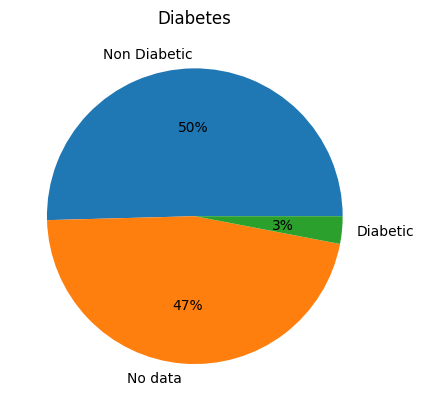

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import RobustScaler

GraceData = pd.read_csv("https://raw.githubusercontent.com/LikeMattorSomething/FutureTalentsProjects/refs/heads/main/Grace_All%20years%20combined%2008-07-2025.csv")

#Convert all values into text
GraceData["Diabetes"] = GraceData["Diabetes"].replace("#NULL!","No data")
GraceData["Diabetes"] = GraceData["Diabetes"].replace("2","Diabetic")
GraceData["Diabetes"] = GraceData["Diabetes"].replace("-1","No data")
GraceData["Diabetes"] = GraceData["Diabetes"].replace("1","Non Diabetic")

#Pie chart showing the distribution of diabetic data in the raw dataset
GraceData["Diabetes"].value_counts().plot(kind='pie',autopct='%1.0f%%',title="Diabetes").set_ylabel("")

#Table showing the count of each category of T2D in the raw dataset
display(GraceData["Diabetes"].value_counts())

#Removes the entries with no data
GraceData = GraceData[GraceData.Diabetes != "No data"]



---


Pie chart showing the distribution of diabetic data in the raw dataset.

Table showing the count of each category of T2D in the raw dataset.

,count
Diabetes,
Non Diabetic,4209
Diabetic,251


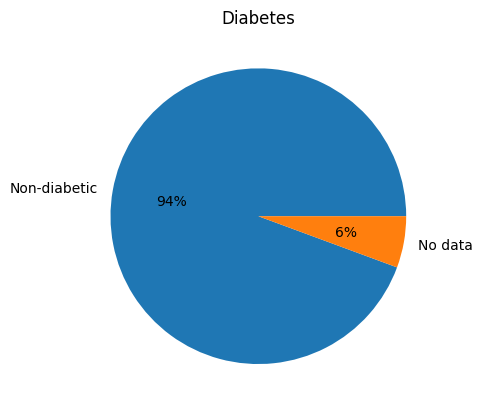

In [2]:
#Pie chart showing the distribution of diabetic data in the raw dataset
GraceData["Diabetes"].value_counts().plot(kind='pie',autopct='%1.0f%%',title="Diabetes",labels=["Non-diabetic","No data","Null","Diabetic"]).set_ylabel("")

#Table showing the count of each category of T2D in the raw dataset
display(GraceData["Diabetes"].value_counts())



---


Pie chart showing the divide in the number of days the survey took in the processed dataset.

Text(0, 0.5, '')

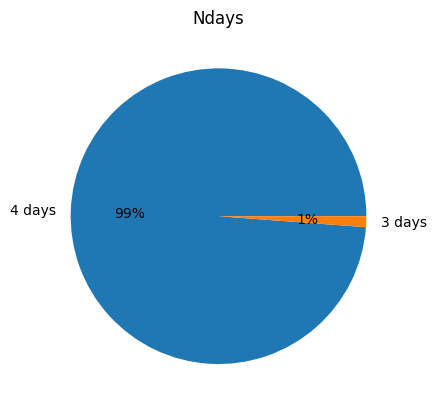

In [3]:
#Pie chart showing the divide in the number of days the survey took in the processed dataset
GraceData["Ndays"].value_counts().plot(kind='pie',autopct='%1.0f%%',title="Ndays",labels=["4 days","3 days"]).set_ylabel("")



---


Frequency chart for the age range in the processed dataset.

<Axes: title={'center': 'Age distribution'}, ylabel='Frequency'>

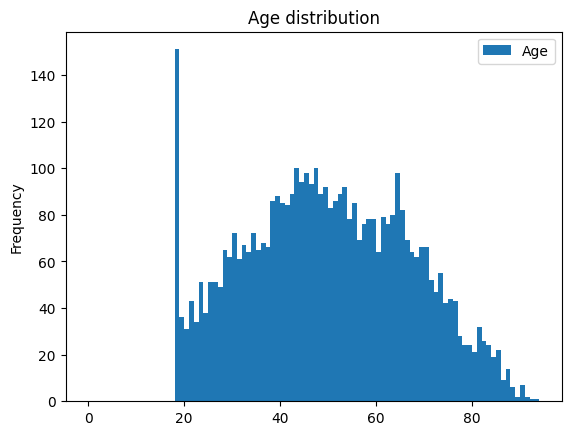

In [4]:
#Frequency chart for the age range in the processed dataset
Column_Name = "Age"
GraceData.plot.hist(y=Column_Name,bins=range(int(GraceData[Column_Name].max()+1)),title="Age distribution")



---


Pie chart showing the split of males and females in the processed dataset.

Text(0, 0.5, '')

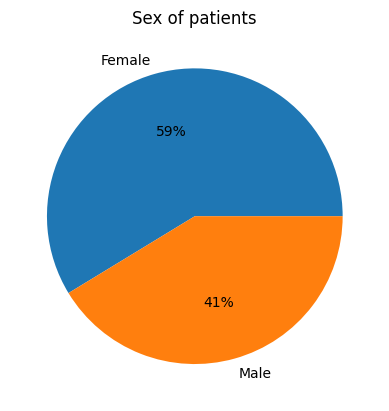

In [5]:
#Pie chart showing the split of males and females in the processed dataset
Column_Name = "Sex"
GraceData[Column_Name].value_counts().plot(kind='pie',autopct='%1.0f%%',title="Sex of patients",labels=["Female","Male"]).set_ylabel("")



---


Chart comparing diabetes distribution of males and females in processed dataset.

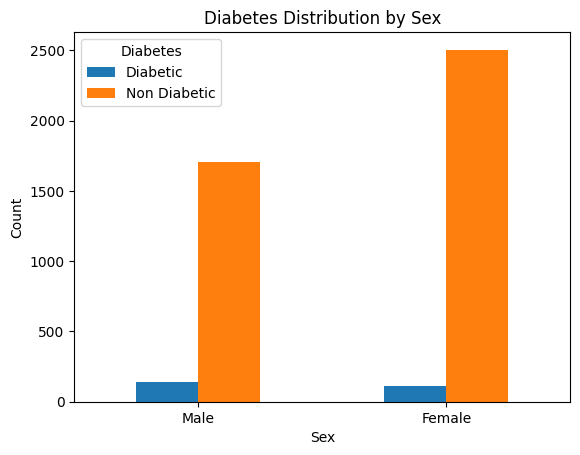

In [6]:
#Chart comparing diabetes distribution of males and females in processed dataset
diabetes_sex_num = GraceData.groupby('Sex')['Diabetes'].value_counts().unstack()

diabetes_sex_num.plot(kind='bar', stacked=False)
plt.title('Diabetes Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0) # 1 is Male and 2 is Female
plt.legend(title='Diabetes')
plt.show()



---


Pie chart showing the ethnicities in the processed dataset.

Text(0, 0.5, '')

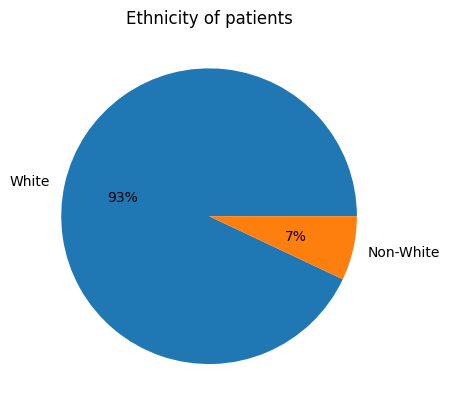

In [7]:
#Pie chart showing the ethnicities in the processed dataset
Column_Name = "ethgr2"
GraceData[Column_Name].value_counts().plot(kind='pie',autopct='%1.0f%%',title="Ethnicity of patients",labels=["White","Non-White"]).set_ylabel("")



---


Table showing the number of entries from each country in the processed dataset.

Pie chart showing the number of entries from each country in the processed dataset.

,count
Country,
England,2790
Scotland,700
Wales,599
Northern Ireland,299
NI,72


Text(0, 0.5, '')

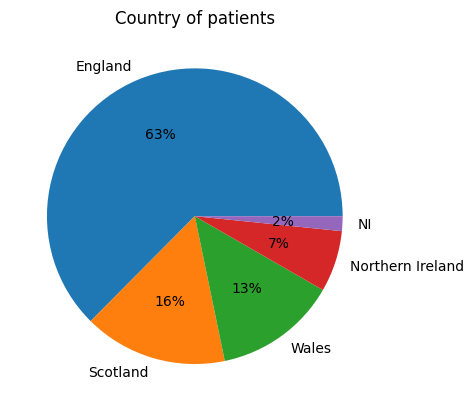

In [8]:
#Table showing the number of entries from each country in the processed dataset
display(GraceData["Country"].value_counts())

#Pie chart showing the number of entries from each country in the processed dataset
Column_Name = "Country"
GraceData[Column_Name].value_counts().plot(kind='pie',autopct='%1.0f%%',title="Country of patients").set_ylabel("")



---


Frequency chart showing the glucose levels of patients in the processed dataset.

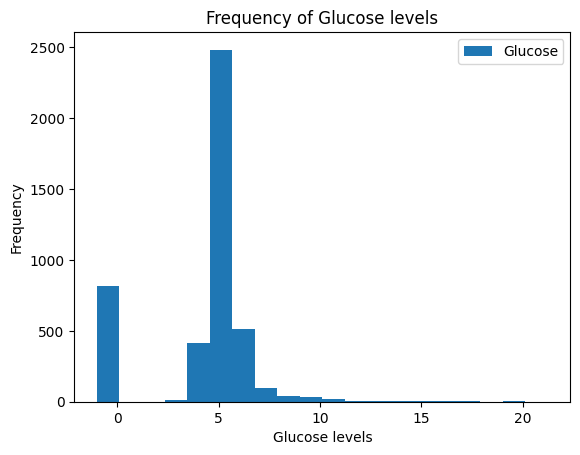

In [9]:
#Frequency chart showing the glucose levels of patients in the processed dataset
Column_Name="Glucose"
GraceData.plot.hist(y=Column_Name, bins=20, title="Frequency of Glucose levels") # Increased bins for better visualization
plt.xlabel("Glucose levels")
plt.ylabel("Frequency")
plt.show()



---


Table showing the general health of the patients in the processed dataset.

Graph showing the count of each entry for general health in the processed dataset.

,count
GenHelf,
2,1939
1,1566
3,757
4,158
5,38


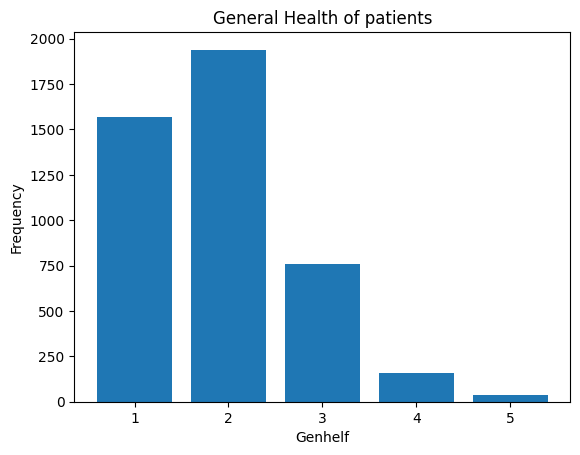

In [10]:
GraceData = GraceData[GraceData.GenHelf != -8]

#Table showing the general health of the patients in the processed dataset
display(GraceData["GenHelf"].value_counts())

#Graph showing the count of each entry for general health in the processed dataset
fruit_counts = GraceData["GenHelf"].value_counts()
plt.bar(fruit_counts.index, fruit_counts.values)
plt.xlabel('Genhelf')
plt.ylabel('Frequency')
plt.title('General Health of patients')
plt.show()



---


Pie chart showing the number of entries that have eaten 5 or more fruit or vegetables per day in the processed dataset.

Text(0, 0.5, '')

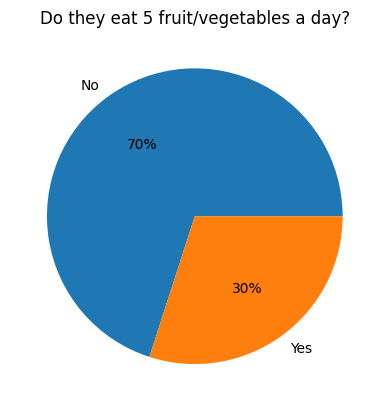

In [11]:
#Pie chart showing the number of entries that have eaten 5 or more fruit or vegetables per day in the processed dataset
Column_Name = "Achieve5"
GraceData[Column_Name].value_counts().plot(kind='pie',autopct='%1.0f%%',title="Do they eat 5 fruit/vegetables a day?",labels=["No","Yes"]).set_ylabel("")

# Data Pre-Processing

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData.info

#Remove data with missing or incorrect diabetes info
GraceData = GraceData[GraceData['Diabetes'] != '#NULL!']
GraceData = GraceData[GraceData['Diabetes'] != '-1']

DiabeticSamples = GraceData[GraceData["Diabetes"] == '2']

#Converts 'Country' column into numerical data
GraceData['Country'] = pd.factorize(GraceData['Country'])[0] + 1

#Removes serialID
#Splits the data into the features and the label
X = GraceData.drop(columns=["Diabetes","seriali"])
y = GraceData["Diabetes"]


# Apply Random Oversampling technique with a ratio of 40%
ros = RandomOverSampler(random_state=0,sampling_strategy=0.4)
X, y = ros.fit_resample(X, y)

#Split data into test and train. 80% test and 20% train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Selection

In [28]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,classification_report,precision_score,recall_score


#Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Choose which model to use
ModelSelection = int(input("1 nearest neighbour, 2 decision tree, 3 random forest: "))
#Choose the parameters
DefaultParameters = int(input("1 Baseline Parameters, 2 Grid Search: "))

#Nearest Neighbour model
if ModelSelection == 1:
  if DefaultParameters == 2:
    parameters = {"n_neighbors":range(1,30)}
  else:
    parameters = {}
  modelType = KNeighborsClassifier(weights="distance")

#Decision Tree model
elif ModelSelection == 2:
  if DefaultParameters == 2:
    parameters = {"max_depth":range(1,30),'max_features': range(1,30)} # Parameters for decision tree
  else:
    parameters = {}
  modelType = DecisionTreeClassifier()

#Random Forest model
elif ModelSelection == 3:
  if DefaultParameters == 2:
    parameters = {"n_estimators": range(1,10),"max_depth": range(1,30),"max_features": range(1,10)}
  elif DefaultParameters == 3:# Secret Third option so we dont have to do a grid search each time
    parameters = {'max_depth': (19,20), 'max_features': (1,2), 'n_estimators': (8,9)}
  else:
    parameters = {}
  modelType = RandomForestClassifier(random_state=40)
else:
  print("Invalid input")

#Create a grid search with the selected model and parameters and use F1 as the metric for determining performance
GSD = GridSearchCV(modelType,parameters, scoring='f1_micro')

#Perform the grid search with the training data
GSD.fit(X_train,y_train)

1 nearest neighbour, 2 decision tree, 3 random forest: 3
1 Baseline Parameters, 2 Grid Search: 3


GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': (19, 20), 'max_features': (1, 2),
                         'n_estimators': (8, 9)},
             scoring='f1_micro')

# Confusion Matrix
RF Confusion matrix with an oversampling ratio of 40% and parameters set to: 'max_depth'= 19, 'max_features'= 2, 'n_estimators'= 8.

RandomForestClassifier(random_state=40)


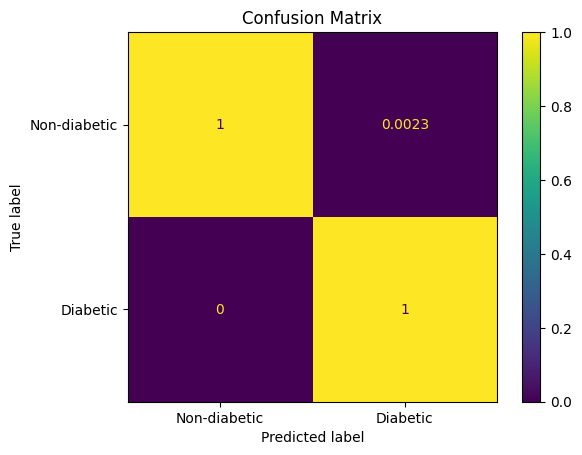

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Uses the best model to make a prediction
PredictedResults = GSD.predict(X_test)
#Get the true results to compair
ActualResults = y_test

#Labels to match the values in y_test
CMlabels = ['1','2']
#Labels to display on the plot
DisplayLabels = ["Non-diabetic","Diabetic"]

#Compaires the predicted results to the real results
cm = confusion_matrix(ActualResults, PredictedResults)
disp = ConfusionMatrixDisplay.from_estimator(GSD, X_test, y_test, normalize="true", labels=CMlabels, display_labels=DisplayLabels)

print(modelType)
plt.title("Confusion Matrix")
plt.show()





---


Bar chart showing model performance using oversampling ratio of 40% truncated to show 0.8 and higher.

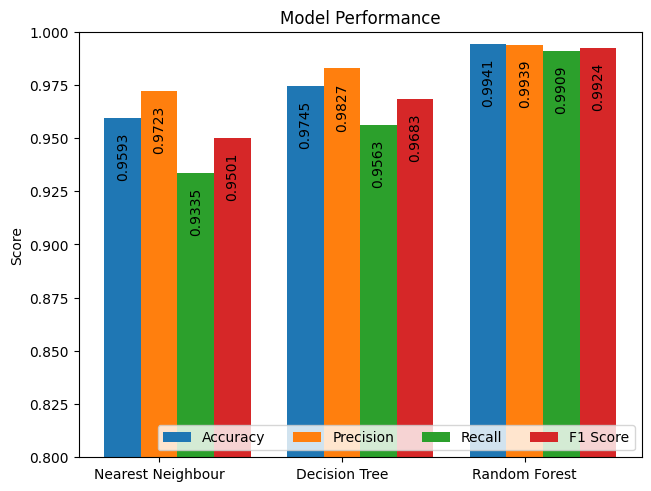

In [15]:
import matplotlib.pyplot as plt
import numpy as np



#Models we tested
Models = ("Nearest Neighbour","Decision Tree","Random Forest")
#Performance data from the grid search
ModelPerformance = {'Accuracy':(0.9593,0.9745,0.9941),'Precision':(0.9723,0.9827,0.9939),'Recall':(0.9335,0.9563,0.9909),'F1 Score':(0.9501,0.9683,0.9924)}


x = np.arange(len(Models))
width=0.20
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in ModelPerformance.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=-45,rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(x + width, Models)
ax.legend(loc='lower right', ncols=4)
ax.set_ylim(0.8, 1)

plt.show()

# ROC-AUC (Area Under Curve)

AUC - ROC Score: 1.00


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


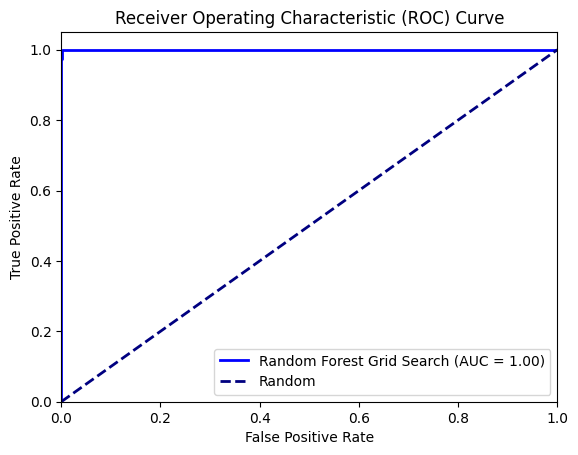

In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = GSD.predict_proba(X_test)[:, 1]
y_pred = GSD.predict(X_test)


roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC - ROC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='2')
roc_auc_plot = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest Grid Search (AUC = %0.2f)' % roc_auc_plot)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance

Graph of feature importance showing all the features of the random forest model.

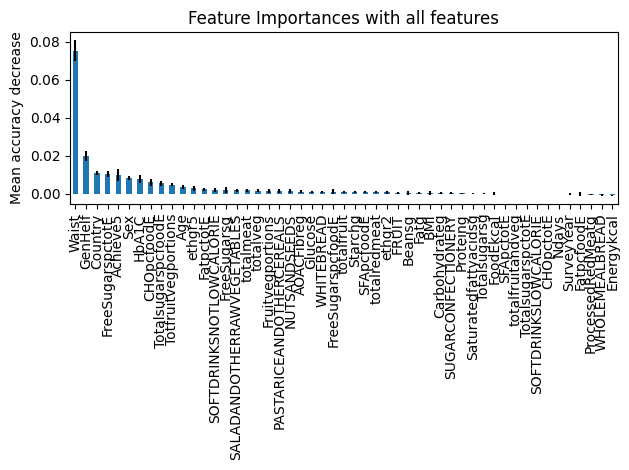

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

# Calculate permutation importance on the original X_test
result = permutation_importance(GSD.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X.columns)

# Exclude the specified features
forest_importances = forest_importances.sort_values(ascending=False)

# Limit to the top 15 features
importances_std = pd.Series(result.importances_std, index=X.columns)

# Plot table
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances_std, ax=ax)
ax.set_title("Feature Importances with all features")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



---


Graph of feature importance with the top 15 dietary features of the random forest model.

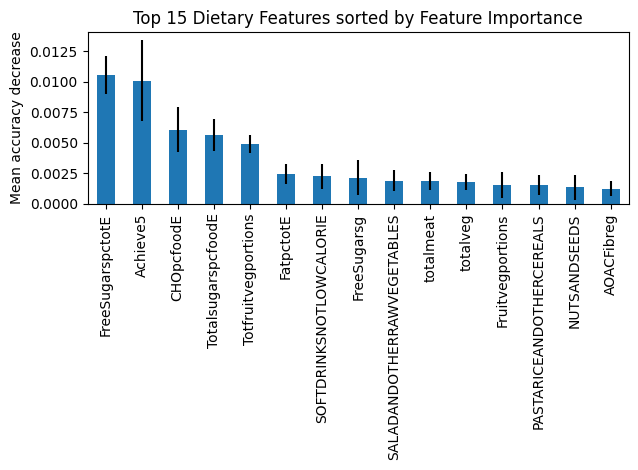

In [41]:
# Select features to remove as to just display dietary information
features_to_exclude = ["SurveyYear","Ndays","Diabetes","Age","Sex","BMI","Waist","ethgr5","ethgr2","Country","Glucose","HbA1C","GenHelf"]



# Calculate permutation importance on the original X_test
result = permutation_importance(GSD.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X.columns)

# Exclude the specified features
forest_importances = forest_importances.drop(features_to_exclude, errors='ignore')
forest_importances = forest_importances.sort_values(ascending=False)

# Limit to the top 15 features
top_15_features = forest_importances.head(15)
importances_std = pd.Series(result.importances_std, index=X.columns).drop(features_to_exclude, errors='ignore')[top_15_features.index]

# Plot table
fig, ax = plt.subplots()
top_15_features.plot.bar(yerr=importances_std, ax=ax)
ax.set_title("Top 15 Dietary Features sorted by Feature Importance")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# SHAP Values

 99%|===================| 13274/13468 [00:24<00:00]       

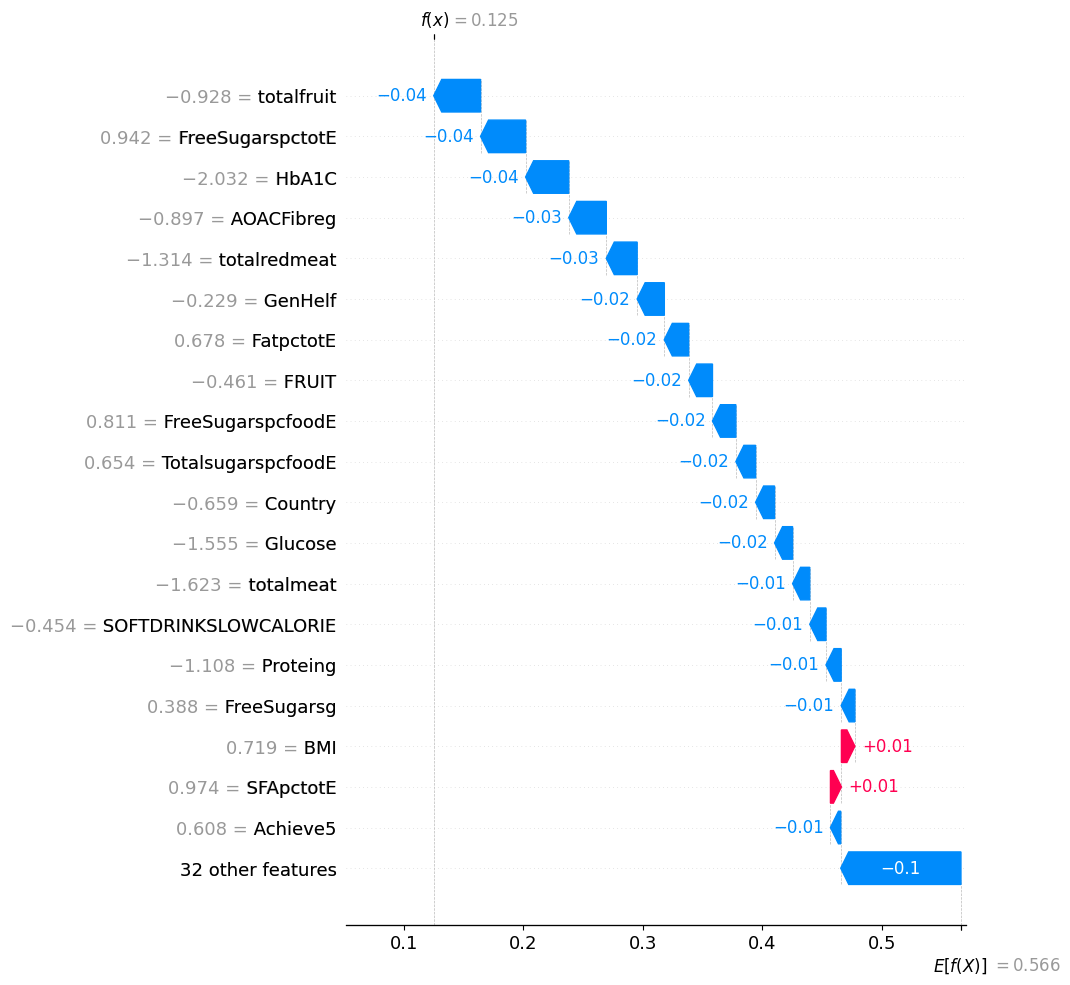

In [55]:
import shap
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

shap.initjs()

explainer = shap.Explainer(GSD.best_estimator_, X_train)

explainer

explanations = explainer(X_train, check_additivity=False)

# Add feature names to the explanations object
explanations.feature_names = X.columns.tolist()


cls_idx = 1
row_idx = 2

shap.plots.waterfall(explanations[row_idx, :, cls_idx],max_display=20)

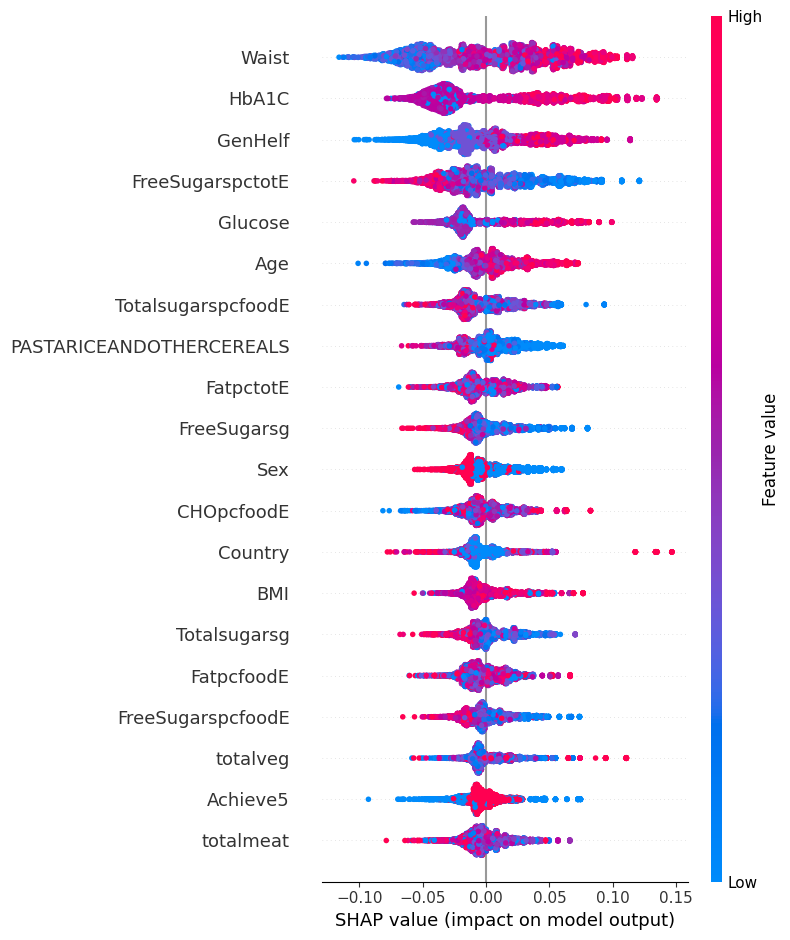

In [51]:
# Generate a SHAP summary plot for a global explanation
# The summary plot shows the distribution of SHAP values for each feature
shap.summary_plot(explanations[:, :, cls_idx], X_train, feature_names=X.columns.tolist())